In [52]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# eml to DuckDB

Notebook to explore cleanly how to go from eml file format to DuckDB database followed The Classes in models/models.py cleanly without different codes etc.
This has to be transformed into different function files later on.

## Imports

In [53]:
from __future__ import annotations
import mailbox
import pandas as pd
import os
import email
from email.header import decode_header
import datetime
from bs4 import BeautifulSoup
from tqdm import tqdm

import duckdb

import json
import uuid
from typing import Dict, Any, Optional, Union

from pathlib import Path

from email import policy


import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display

# from eralchemy2 import render_er
# from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float

import jinja2


### Importing Function & Classes

#### Classes

In [54]:
from src.data.email_analyzer import EmailAnalyzer

#### Functions

In [55]:
from src.data.eml_transformation import process_eml_files
from src.data.duckdb_utils import setup_database

#### Constants

In [56]:
from constants import ACTIVE_PROJECT

### Vars

In [57]:
### Test des fonctions:
# mbox_single_file_path = 'data/processed/mailbox_cecile/AG.mbox'
# mbox_path = 'data/processed/mailbox_cecile/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/Archive/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/'
# TEST_SAMPLE_PATH = 'data/processed/celine_readpst_with_S/celine.guyon/Boîte de réception/Archives calssifiees'


# db_path = "data/Projects/Boîte mail de Céline/processed/celine.duckdb"

# TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Archive'
# TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Éléments envoyés'
TEST_SAMPLE_PATH = 'data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/'

# /home/onyxia/work/olkoa/data/Projects/Projet Demo/Boîte mail de Céline/processed/celine.guyon/Boîte de réception/gestioncrise
db_path = f"data/Projects/{ACTIVE_PROJECT}/{ACTIVE_PROJECT}.duckdb"

In [76]:
print(f"{ACTIVE_PROJECT}")

Projet Demo


## Functions

### Main

In [ ]:
db_path

'data/Projects/Projet Demo/Projet Demo.duckdb'

: 

In [77]:
duckdb_conn = setup_database(db_path)

attempting connection
Connection Done


# Make The Database here (desactivated while db is up)

In [59]:
# process_eml_files(TEST_SAMPLE_PATH, db_path)

In [60]:
pd.reset_option('display.max_columns')

analyzer =EmailAnalyzer(db_path)
analyzer.get_email_summary()

df_db_cleaned = analyzer.export_to_dataframe()
df_db_cleaned

[DEBUG] Total entries in receiver_emails: 19137
[DEBUG] Total emails: 19137
[DEBUG] Emails by folder: [{'folder': 'Boîte de réception', 'count': 12499}, {'folder': 'Éléments envoyés', 'count': 5559}, {'folder': 'Boîte de réception/Archives calssifiees', 'count': 423}, {'folder': 'Éléments supprimés', 'count': 277}, {'folder': 'Boîte de réception/gestioncrise', 'count': 75}, {'folder': 'Boîte de réception/Instances', 'count': 60}, {'folder': 'Courrier indésirable', 'count': 45}, {'folder': 'Brouillons', 'count': 41}, {'folder': 'Boîte de réception/RH', 'count': 40}, {'folder': 'Boîte de réception/Plaidoyer', 'count': 38}, {'folder': 'Boîte de réception/gestioncrise/Ateliers', 'count': 28}, {'folder': 'Boîte de réception/Idees', 'count': 18}, {'folder': 'Archive', 'count': 10}, {'folder': 'Boîte de réception/Gazette', 'count': 10}, {'folder': 'Boîte de réception/AG', 'count': 6}, {'folder': 'Boîte de réception/Conflit', 'count': 6}, {'folder': 'Boîte de réception/Formation à distance', '

,message_id,subject,mailbox_name,direction,from,to,date,folder,attachment_count,body
0,<CALft2+s+Qc_Y4TS=nSAK5_K_+2Q_MG-FzP9iKLcJTxoW...,"[SPAM] Fwd: Congé office sans solde, fonds de ...",Boîte mail de Céline,received,richard patry,undisclosed-recipients:,2022-09-18 11:24:42,Courrier indésirable,0,Pour se désinscrire et tout contact 30/08/22 M...
1,<32be645d-f1c3-428a-b42b-2c9ddafac53d@histoire...,[SPAM] [hco-info] Projection-débat : L'Algérie...,Boîte mail de Céline,received,contact2@histoirecoloniale.net,hco-info@lists.riseup.net,2023-11-20 02:16:21,Courrier indésirable,2,
2,<3fbb4869603e547f50c27c3ff0bac92f@inserm.fr>,Re: [AAF_Bureau] RH,Boîte mail de Céline,received,Helene Chambefort,Helene Chambefort,2021-06-02 09:24:34,Courrier indésirable,0,"Bonjour,\nC'est une blague?\nHélène\nDISC/ Ser..."
3,<CALjO3ZFXeV3CrXE6P8+mSrGXsfEdq1DW0JkELkGsB2R4...,"[SPAM] Hello,",Boîte mail de Céline,received,Donna Louise,undisclosed-recipients:,2021-07-09 22:56:50,Courrier indésirable,0,"Hello my dear,\nI sent this mail praying it wi..."
4,<CAAan9Pxz1J4PN4KURarC=oE-6_mE-EfoO1jPZxGQVhKb...,"[SPAM] Fwd: Report des 64 ans dévoyé par LFI,",Boîte mail de Céline,received,RICHARD PATRY,undisclosed-recipients:,2023-11-24 22:08:44,Courrier indésirable,1,Pour se désincrire et tout contactpatry.richar...
...,...,...,...,...,...,...,...,...,...,...
19132,<79cbf4fa2a9e49d0b00518323dbd9bb4@archivistes....,Lettre à l’intention des directeurs des Archiv...,Boîte mail de Céline,received,AAF présidence,None,2020-01-27 12:33:12,Boîte de réception,1,"Madame, Monsieur, cher.e.s collègues,\nDans la..."
19133,<c7a2b976d26349109fda7acfab2d0295@assemblee-na...,Réunion transpartisane - Accès aux archives pu...,Boîte mail de Céline,received,Sébastien Jumel,None,2021-04-21 09:25:42,Boîte de réception,0,"Chers Présidents, Cher(e)s collègues, Mesdames..."
19134,<11e7389160ce4855a60f11c0d75d3a8f@assemblee-na...,Réunion transpartisane - Accès aux archives pu...,Boîte mail de Céline,received,Sébastien Jumel,None,2021-05-03 15:46:44,Boîte de réception,0,"Chers Présidents, Cher(e)s collègues, Mesdames..."
19135,<8e8e3e29df8c470f9b7d03baabf58572@archivistes....,[AAF_Bureau] Bureau spécial AG | Mardi 19 mai ...,Boîte mail de Céline,received,Helene Chambefort,None,2020-05-13 10:37:53,Boîte de réception/Instances,2,"Bonjour à tous,\nNous nous donnons rendez-vous..."


In [61]:
# df_db_cleaned["date"][0]

In [62]:
# Method 1: List all tables
# tables = duckdb_conn.execute("SELECT * FROM information_schema.tables").fetchall()
# print("Tables in database:")
# for table in tables:
#     print(table)

# Method 2: Get all tables and their columns
all_columns = duckdb_conn.execute("""
    SELECT
        table_schema,
        table_name,
        column_name,
        data_type
    FROM information_schema.columns
    ORDER BY table_schema, table_name, ordinal_position
""").fetchall()
print("\nAll columns in database:")
for column in all_columns:
    print(column)


# duckdb_conn


All columns in database:
('main', 'attachments', 'id', 'VARCHAR')
('main', 'attachments', 'email_id', 'VARCHAR')
('main', 'attachments', 'filename', 'VARCHAR')
('main', 'attachments', 'content', 'BLOB')
('main', 'attachments', 'content_type', 'VARCHAR')
('main', 'attachments', 'size', 'INTEGER')
('main', 'email_children', 'parent_id', 'VARCHAR')
('main', 'email_children', 'child_id', 'VARCHAR')
('main', 'email_recipients_bcc', 'email_id', 'VARCHAR')
('main', 'email_recipients_bcc', 'entity_id', 'VARCHAR')
('main', 'email_recipients_cc', 'email_id', 'VARCHAR')
('main', 'email_recipients_cc', 'entity_id', 'VARCHAR')
('main', 'email_recipients_to', 'email_id', 'VARCHAR')
('main', 'email_recipients_to', 'entity_id', 'VARCHAR')
('main', 'entities', 'id', 'VARCHAR')
('main', 'entities', 'name', 'VARCHAR')
('main', 'entities', 'email', 'VARCHAR')
('main', 'entities', 'alias_names', 'JSON')
('main', 'entities', 'alias_emails', 'JSON')
('main', 'entities', 'is_physical_person', 'BOOLEAN')
('ma

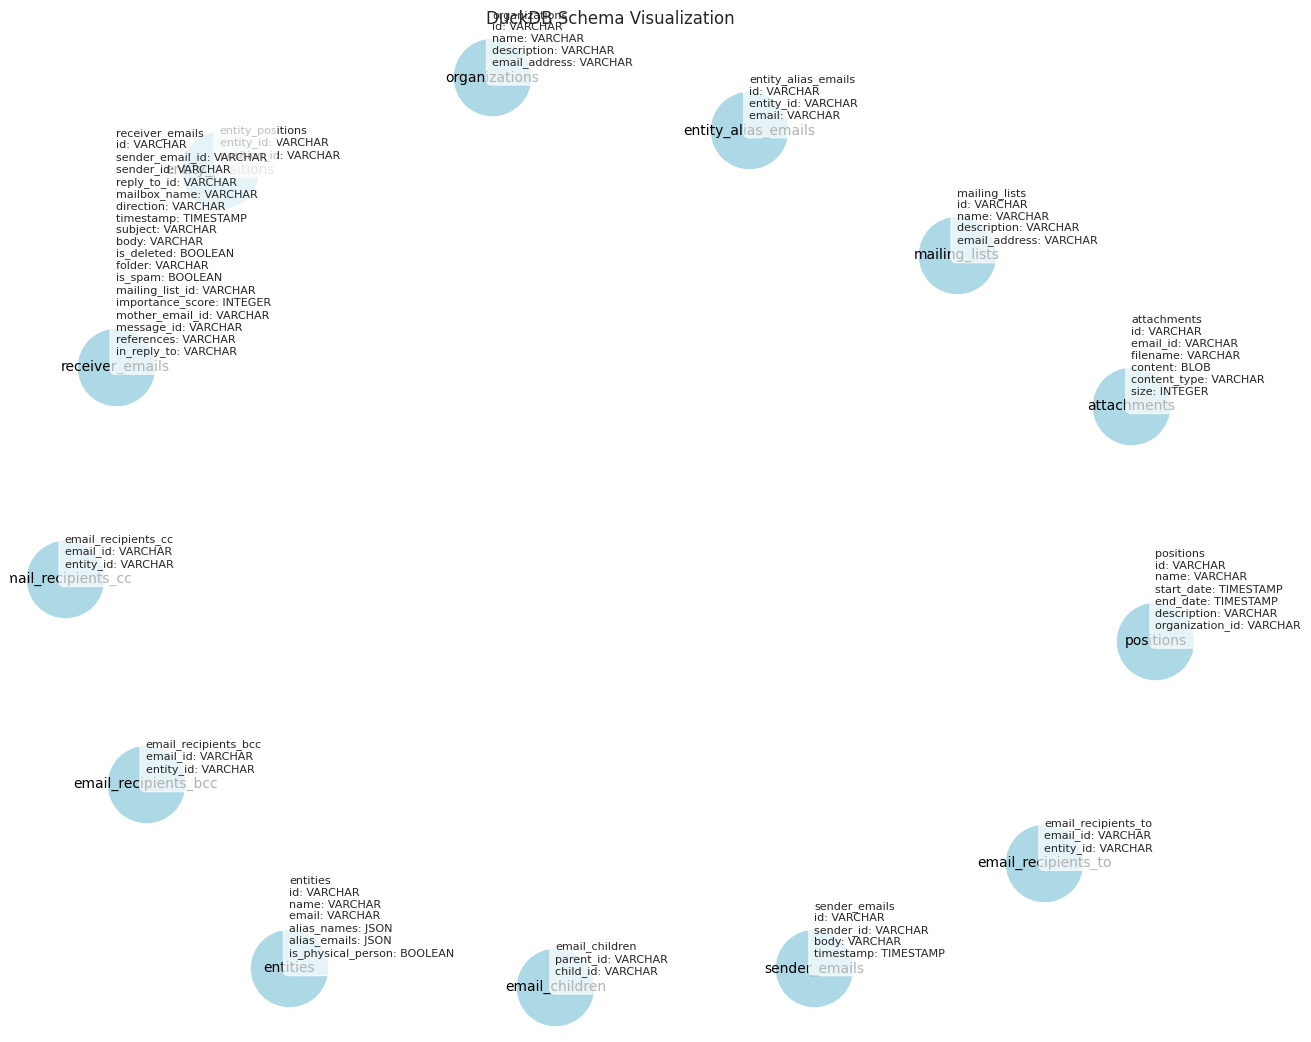

In [63]:
# Connect to your DuckDB database
# conn = duckdb.connect('your_database.db')  # or use ':memory:' for in-memory database

# Method 1: Get schema information as pandas DataFrame
def get_schema_as_dataframe():
    # Get all tables
    tables_df = duckdb_conn.execute("""
        SELECT table_schema, table_name
        FROM information_schema.tables
        WHERE table_schema != 'pg_catalog'
    """).df()

    # Get all columns with their data types
    columns_df = duckdb_conn.execute("""
        SELECT
            table_schema,
            table_name,
            column_name,
            data_type,
            is_nullable,
            column_default
        FROM information_schema.columns
        WHERE table_schema != 'pg_catalog'
        ORDER BY table_schema, table_name, ordinal_position
    """).df()

    return tables_df, columns_df

# Method 2: Print schema in a readable format
def print_schema():
    # Get all tables
    tables = duckdb_conn.execute("""
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'main'
    """).fetchall()

    for table in tables:
        table_name = table[0]
        print(f"\n=== TABLE: {table_name} ===")

        # Get columns for this table
        columns = duckdb_conn.execute(f"""
            DESCRIBE {table_name}
        """).fetchall()

        # Print column information
        for col in columns:
            print(f"{col[0]}: {col[1]}")

# Method 3: Visualize schema using networkx and matplotlib
def visualize_schema():
    # Get tables and their columns
    tables_columns = duckdb_conn.execute("""
        SELECT
            table_name,
            column_name,
            data_type
        FROM information_schema.columns
        WHERE table_schema = 'main'
        ORDER BY table_name, ordinal_position
    """).fetchall()

    # Create a graph
    G = nx.DiGraph()

    # Group by tables
    tables = {}
    for table_name, column_name, data_type in tables_columns:
        if table_name not in tables:
            tables[table_name] = []
        tables[table_name].append((column_name, data_type))

    # Add nodes for tables
    for table_name, columns in tables.items():
        # Create label with table name and columns
        label = f"{table_name}\n"
        for col_name, col_type in columns:
            label += f"{col_name}: {col_type}\n"

        G.add_node(table_name, label=label)

    # Try to find foreign key relationships (this is simplified)
    # In a real scenario, you'd need to query DuckDB's constraints
    for table1 in tables:
        for table2 in tables:
            if table1 != table2:
                for col1_name, _ in tables[table1]:
                    if col1_name == f"{table2}_id":
                        G.add_edge(table1, table2)

    # Draw the graph
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=3000, arrows=True, font_size=10)

    # Add detailed labels
    labels = nx.get_node_attributes(G, 'label')
    text_items = {}
    for node, label in labels.items():
        text_items[node] = plt.annotate(label, xy=pos[node],
                                       xytext=(0, 0),
                                       textcoords="offset points",
                                       bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7),
                                       fontsize=8)

    plt.title("DuckDB Schema Visualization")
    plt.show()

# Example usage:
tables_df, columns_df = get_schema_as_dataframe()
# display(tables_df)
# display(columns_df)

# print_schema()

visualize_schema()

In [64]:
print_schema()


=== TABLE: attachments ===
id: VARCHAR
email_id: VARCHAR
filename: VARCHAR
content: BLOB
content_type: VARCHAR
size: INTEGER

=== TABLE: email_children ===
parent_id: VARCHAR
child_id: VARCHAR

=== TABLE: email_recipients_bcc ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: email_recipients_cc ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: email_recipients_to ===
email_id: VARCHAR
entity_id: VARCHAR

=== TABLE: entities ===
id: VARCHAR
name: VARCHAR
email: VARCHAR
alias_names: JSON
alias_emails: JSON
is_physical_person: BOOLEAN

=== TABLE: entity_alias_emails ===
id: VARCHAR
entity_id: VARCHAR
email: VARCHAR

=== TABLE: entity_positions ===
entity_id: VARCHAR
position_id: VARCHAR

=== TABLE: mailing_lists ===
id: VARCHAR
name: VARCHAR
description: VARCHAR
email_address: VARCHAR

=== TABLE: organizations ===
id: VARCHAR
name: VARCHAR
description: VARCHAR
email_address: VARCHAR

=== TABLE: positions ===
id: VARCHAR
name: VARCHAR
start_date: TIMESTAMP
end_date: TIMESTAMP
descri

In [65]:

# Set pandas display option to show all columns
pd.set_option('display.max_columns', None)

In [66]:
analyzer =EmailAnalyzer(db_path)

df_db_cleaned = analyzer.get_comprehensive_email_dataset()
df_db_cleaned.head(2)


,email_id,message_id,mailbox_name,direction,timestamp,subject,body,folder,is_deleted,is_spam,importance_score,in_reply_to,references,sender_id,sender_name,sender_email,sender_is_person,reply_to_id,reply_to_name,reply_to_email,mailing_list_id,mailing_list_name,mailing_list_email,attachment_count,attachment_filenames,total_attachment_size,child_email_count,mother_email_id,entity_id,recipient_name,recipient_email,recipient_type
0,f33d91c0-c455-42a6-b5fb-188ce5e02141,<ef84837018fc4f7ebed15d1a40374a9d@archivistes....,Boîte mail de Céline,received,2022-07-05 13:22:37,[aaf_adherents] AAF_élections : résultats des ...,"Bonjour,\nComme vous le savez, nous avons proc...",Éléments supprimés,False,False,0,,,560e14b1-a62b-4922-b966-a1d1a6f4275a,Nicolas Didon - responsable de la vie associat...,aaf_adherents@listes.archivistes.org,True,c46771a9-8b54-47b9-809e-327a8a602c8d,"AAF - Anne Clerc, déléguée générale",delegation_generale@archivistes.org,6f80b792-0448-4013-97cd-e36bae144323,aaf_adherents.listes.archivistes.org,sympa@listes.archivistes.org,7,"ATT00001.txt, 2022_pv_operations_electorales.p...",1047778.0,0,None,560e14b1-a62b-4922-b966-a1d1a6f4275a,Nicolas Didon - responsable de la vie associat...,aaf_adherents@listes.archivistes.org,to
1,ffe963fa-7e47-4943-9905-712f2231ae10,<1644247124553.20914@ch-bretagne-atlantique.fr>,Boîte mail de Céline,received,2022-02-07 15:18:44,RE: [AAF_CA2019-2022] Liste d'adhésions à vali...,"​Bonjour,\nC'est OK pour moi aussi.\nBonne fin...",Éléments supprimés,False,False,0,<d5485d890f264c22aba4ae2e906bdc64@departement-...,<01c1a62d748d4994a9a2f7eec6cd874d@archivistes....,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,True,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,f32f6294-733e-4cdc-b4c3-26d4595ee6fa,aaf_ca2019.listes.archivistes.org,sympa@listes.archivistes.org,1,image001.jpg,4614.0,0,None,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,to


In [67]:
df_db_cleaned[df_db_cleaned["sender_email"].isin(["celine.guyon@archivistes.org"])]


,email_id,message_id,mailbox_name,direction,timestamp,subject,body,folder,is_deleted,is_spam,importance_score,in_reply_to,references,sender_id,sender_name,sender_email,sender_is_person,reply_to_id,reply_to_name,reply_to_email,mailing_list_id,mailing_list_name,mailing_list_email,attachment_count,attachment_filenames,total_attachment_size,child_email_count,mother_email_id,entity_id,recipient_name,recipient_email,recipient_type
1297,63963e25-183a-45e0-9382-4874d91dd810,<f711b1c3d3d04e238fc3c1391a608d74@archivistes....,Boîte mail de Céline,sent,2019-06-03 13:32:42,TR: groupe de travail LDH histoire-mémoire-arc...,De : agnès dejob <agnesdejob@hotmail.com>\nEnv...,Boîte de réception,False,False,0,<AM6P193MB039233B22F8059B01F3536F8D71D0@AM6P19...,<032301d504d7$4dfd66f0$e9f834d0$@ldh-france.or...,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,None,None,None,None,None,None,2,"Comités scientifique et de parrainage.doc, Pro...",82432.0,0,None,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,to
1310,9025872c-f6f9-4458-8b43-d025063f2a9e,<02ba0c86cab647e3b410570389e0c03a@archivistes....,Boîte mail de Céline,received,2021-10-12 12:07:20,RE: [aaf-pin20ans] Rappel : Réunion point orga...,"Bonjour,\nAvec toutes mes excuses mais je ne p...",Boîte de réception,False,False,0,<3e71cdd4bcb91edd4e82ff2719e37d46@association-...,<9db5fec5b7ee2eca9939e5356dd6e6d1@association-...,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,fcef7c3b-41dc-4963-b11f-fdc623eb9f02,aaf-pin20ans@groupes.renater.fr,aaf-pin20ans@groupes.renater.fr,88dcd2bf-d69c-4a28-81e3-5900612a0e62,aaf-pin20ans.groupes.renater.fr,sympa@groupes.renater.fr,1,50938b10.jpeg,17304.0,0,None,fcef7c3b-41dc-4963-b11f-fdc623eb9f02,aaf-pin20ans@groupes.renater.fr,aaf-pin20ans@groupes.renater.fr,to
5488,1f55425d-1996-471a-b533-0247c048749d,<9de63f25-3e15-42df-bb9b-65fef9e37b7b@email.an...,Boîte mail de Céline,sent,2020-01-24 07:58:36,cahiers_assisesdudesign_2019.pdf,,Éléments envoyés,False,False,0,,,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,None,None,None,None,None,None,1,cahiers_assisesdudesign_2019.pdf,924879.0,0,None,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,to
7281,d9b44f32-ed6e-4243-95a4-d55f7cab1761,<dd5806fc-d561-4327-8dee-f96d5fbbe79c@email.an...,Boîte mail de Céline,sent,2020-04-07 15:56:37,,,Éléments envoyés,False,False,0,,,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,None,None,None,None,None,None,1,2020-04-07_035138.pdf,2835711.0,0,None,e7429f43-9ea3-4dc8-8541-652d8d3df86e,Céline Guyon,celineguyon@gmail.com,to
8941,9e2b2a8b-034d-4358-a47f-508fd6b7dc03,<e23cc7c8-50cd-44b5-bc74-34e623a2a7d9@email.an...,Boîte mail de Céline,sent,2021-06-29 00:06:46,Re: communiqué de presse,"Le 29 juin 2021 12:05 AM, celine.guyon@archivi...",Éléments envoyés,False,False,0,<133da2c4-db9c-4c6b-a3ec-66c72ca78f1b@email.an...,,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,None,None,None,None,None,None,1,CP 28 juin 2021 v3.docx,21505.0,0,None,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,to
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70006,9d189ca8-b1a3-4a82-80f0-4229aabfb3d7,<2dd3b0ed-0841-4da3-8630-c90c1f14b0f6@email.an...,Boîte mail de Céline,sent,2021-08-27 13:43:07,RE: Journée du 13 septembre,"Chère Marie,J'avais compris qu'on devait passe...",Éléments envoyés,False,False,0,,,ced5a927-998b-4095-8cfe-19407e18891d,AAF - Céline Guyon,celine.guyon@archivistes.org,True,None,None,None,None,None,None,0,None,NaN,0,None,a5bb36ff-1895-4072-9a60-33d6af3274a3,CORNU Marie,marie.cornu@cnrs.fr,to
70038,b0fd8ea2-9748-44f9-a3a4-524d49047f48,<c3a99c14-b268-415f-8d99-e29ecb7c82f7@email.an...,Boîte mail de

In [68]:
df_db_cleaned.folder.value_counts()

folder
Boîte de réception                          58342
Éléments envoyés                             7232
Boîte de réception/Archives calssifiees      3409
Éléments supprimés                            738
Boîte de réception/gestioncrise               270
Boîte de réception/RH                         242
Boîte de réception/Instances                  116
Boîte de réception/Plaidoyer                   84
Courrier indésirable                           70
Boîte de réception/gestioncrise/Ateliers       56
Brouillons                                     47
Archive                                        40
Boîte de réception/Idees                       18
Boîte de réception/Gazette                     18
Boîte de réception/AG                          15
Boîte de réception/Conflit                     12
Boîte de réception/Formation à distance         2
Name: count, dtype: int64

In [69]:
df_db_cleaned["body"].duplicated().value_counts()

body
True     52107
False    18604
Name: count, dtype: int64

In [70]:
df_receiver = analyzer.get_receiver_emails()

In [71]:
df_receiver

,id,sender_email_id,sender_id,reply_to_id,mailbox_name,direction,timestamp,subject,body,is_deleted,folder,is_spam,mailing_list_id,importance_score,mother_email_id,message_id,references,in_reply_to
0,c9830d87-f4b6-4097-96da-3b15c2ba0474,bf0681a2-703c-47e6-b9b3-cb54fe6d9f76,03f79e06-aa69-4e14-8627-756ffccff430,None,Boîte mail de Céline,received,2022-09-18 11:24:42,"[SPAM] Fwd: Congé office sans solde, fonds de ...",Pour se désinscrire et tout contact 30/08/22 M...,False,Courrier indésirable,False,None,0,None,<CALft2+s+Qc_Y4TS=nSAK5_K_+2Q_MG-FzP9iKLcJTxoW...,<ea-mime-63249ea4-3308-27895951@www-1.netcourr...,<ea-mime-63249ea4-3308-27895951@www-1.netcourr...
1,2891b1ca-3ebd-4ace-a208-2673230b1f33,63ae81aa-5339-4098-9de1-fefaad80c0b0,bfa7c6f0-c68c-4a54-a21d-da9b2b490434,None,Boîte mail de Céline,received,2022-06-08 12:48:17,[SPAM] Fwd: traitements efficaces précoces pou...,Pour se désinscrire et tout contact 5/06/22\np...,False,Courrier indésirable,False,None,0,None,<CAHAcyOnxhi+afQEMOjx8FDRCfw-cv5Y16e82wkqXUo0Y...,<PAXP193MB23619C48BBA9058908E0079C8EA49@PAXP19...,<PAXP193MB23619C48BBA9058908E0079C8EA49@PAXP19...
2,120256e8-ab92-49e1-b573-0015c6621ccc,b25c7820-7f4e-419a-b41c-dcbb75b28c25,3e90f228-6d02-4591-b09f-8bd68571feb7,3e90f228-6d02-4591-b09f-8bd68571feb7,Boîte mail de Céline,received,2023-11-20 02:16:21,[SPAM] [hco-info] Projection-débat : L'Algérie...,,False,Courrier indésirable,False,41c15fda-fde2-4103-a18e-85fe59a6d583,0,None,<32be645d-f1c3-428a-b42b-2c9ddafac53d@histoire...,,
3,90cb9ca1-a5ad-4157-a44e-41c8d9285561,9f67a62c-d79e-4107-a61f-baf161d597e5,291c73b7-55bb-44b3-b914-a271a744d45c,291c73b7-55bb-44b3-b914-a271a744d45c,Boîte mail de Céline,received,2021-06-02 09:24:34,Re: [AAF_Bureau] RH,"Bonjour,\nC'est une blague?\nHélène\nDISC/ Ser...",False,Courrier indésirable,False,290a0b66-de81-4353-aad4-f1490451daee,0,None,<3fbb4869603e547f50c27c3ff0bac92f@inserm.fr>,<c040654dd7e8468a8e4850e84315816d@archivistes....,<c040654dd7e8468a8e4850e84315816d@archivistes....
4,986abe57-8b63-422f-855d-64cb99cb61c5,152c0bc0-823a-4749-826b-8e4f31f894f9,62c86822-e3bf-4af1-b47a-77515f058aa9,None,Boîte mail de Céline,received,2021-07-09 22:56:50,"[SPAM] Hello,","Hello my dear,\nI sent this mail praying it wi...",False,Courrier indésirable,False,None,0,None,<CALjO3ZFXeV3CrXE6P8+mSrGXsfEdq1DW0JkELkGsB2R4...,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19132,f0236208-5c41-4a83-9dc0-01b26c7ccc83,3c434c15-b7dc-4865-b566-db6553e3f63b,1d3cfeb8-f470-4738-a528-b911756677ef,None,Boîte mail de Céline,received,2019-10-10 14:48:49,Forum Changer d'ère » Flora Fischer,http://www.forumchangerdere.fr/speaker-lineup/...,False,Boîte de réception/Gazette,False,None,0,None,<7smcslgh27a6v7xpmge1ngpe.1570711729554@email....,,
19133,c0d006c4-fc80-4804-8882-72561cb9790e,bf2ed04c-5ba1-4b25-80d4-dc9b921f31b9,1d3cfeb8-f470-4738-a528-b911756677ef,1d3cfeb8-f470-4738-a528-b911756677ef,Boîte mail de Céline,received,2019-10-08 20:54:02,Re: Tweet Gazette Forum,"Bonsoir,\nOui, c'est un phénomène qui sans pre...",False,Boîte de réception/Gazette,False,None,0,None,<19961989.8976.1570560842956.JavaMail.www@wwin...,<b5c80bd25cf3463f8f0b9b6b0a06f4ce@archivistes....,<6cc30552-3dfe-453d-aa7c-e351c88a4f96@email.an...
19134,ae085001-6e14-45fd-a045-66f87b5da5b9,5a601767-f682-4eb2-923f-e4a3652664d7,a8d60b7a-6cdd-41eb-8162-e6f1f2bee168,None,Boîte mail de Céline,received,2020-01-24 16:07:12,La Gazette des archives n° 256 « La Francophon...,"Re-bonjour à toutes les deux, Je vous envoie p...",False,Boîte de réception/Gazette,False,None,0,None,<ee5a7194e44f43c8ad1b29153edd3459@archivistes....,,
19135,d756904d-9425-4360-a3bf-7e265a07327c,0111999b-b826-4e51-8186-e548f8b694c8,e7429f43-9ea3-4dc8-8541-652d8d3df86e,None,Boîte mail de Céline,received,2019-10-08 19:25:02,Comite rédaction,https://twitter.com/nicolas_beaupre/status/118...,False,Boîte de réception/Gazette,False,None,0,None,<CAEBEGL9rHBf4mqnyi_2Za29SH+o5PHtUFaXoJtumeRz6...,,


In [72]:
app_df = analyzer.get_app_DataFrame()
app_df.head(2)

Index(['message_id', 'date', 'mailbox_name', 'direction', 'from', 'subject',
       'body', 'attachments', 'has_attachments', 'mailbox', 'recipient_email',
       'recipient_type'],
      dtype='object')


,message_id,date,mailbox_name,direction,from,subject,body,attachments,has_attachments,mailbox,recipient_email,recipient_type
0,<32be645d-f1c3-428a-b42b-2c9ddafac53d@histoire...,2023-11-20 02:16:21,Boîte mail de Céline,received,contact2@histoirecoloniale.net,[SPAM] [hco-info] Projection-débat : L'Algérie...,,"[ATT00001.txt, Flyer Algérie essais nucléair...",True,Courrier indésirable,hco-info@lists.riseup.net,to
1,<CAAan9Pxz1J4PN4KURarC=oE-6_mE-EfoO1jPZxGQVhKb...,2023-11-24 22:08:44,Boîte mail de Céline,received,loimobilite501@gmail.com,"[SPAM] Fwd: Report des 64 ans dévoyé par LFI,",Pour se désincrire et tout contactpatry.richar...,[Report des 64 ans dévoyé par LFI.odt],True,Courrier indésirable,unknown@example.com,to


In [74]:
app_df["recipient_type"].value_counts()

recipient_type
to    38814
cc    31897
Name: count, dtype: int64

good sur le papier mais pas en vrai: 5506 <>mail nom

In [ ]:
app_df[app_df["to"] == "violette.levy@culture.gouv.fr"].head(1)

,message_id,date,mailbox_name,direction,from,to,cc,subject,body,attachments,has_attachments,mailbox
2284,<52ca83a124044796ab0db061f2f3ed71@archivistes....,2020-03-16 12:52:32,Boîte mail de Céline,sent,unknown@example.com,violette.levy@culture.gouv.fr,None,RE: Abrégé : propositions de couverture,"bonjour,\nJe vous rejoins sur la deuxième prop...",[image003.jpg],True,Éléments envoyés


In [ ]:
app_df["from"].value_counts()

from
unknown@example.com                    5354
delegation_generale@archivistes.org    1785
aaf_ca2019@listes.archivistes.org      1392
rbranche@parisnanterre.fr               660
pierremansat@gmail.com                  584
                                       ... 
louis.colombani@anaphore.eu               1
i.vernus@saoneetloire71.fr                1
claire.gaillard@enssib.fr                 1
valerie.rondelli@ville-menton.fr          1
sylvia.skoric.fd@clb-an.fr                1
Name: count, Length: 513, dtype: int64

In [ ]:
app_df["to"].value_counts()

to
unknown@example.com                                                                                                     4374
celine.guyon@archivistes.org                                                                                            3338
aaf_ca2019@listes.archivistes.org                                                                                       1775
aaf_bureau@listes.archivistes.org                                                                                        567
aaf_adherents@listes.archivistes.org                                                                                     462
                                                                                                                        ... 
xavier.cailleau@wikimedia.fr, helene.chambefort@inserm.fr, delegation_generale@archivistes.org                             1
formation@archivistes.org, laurent.ducol@saint-gobain.com, celine.guyon@archivistes.org                                   

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from anytree import Node, RenderTree
# from anytree.exporter import DotExporter
# import graphviz

# # Sample data from value_counts (let's assume it's in a Series)
# data = {
#     "celine.guyon/Boîte de réception": 12499,
#     "celine.guyon/Éléments envoyés": 5559,
#     "celine.guyon/Boîte de réception/Archives calssifiees": 423,
#     "celine.guyon/Éléments supprimés": 277,
#     "celine.guyon/Boîte de réception/gestioncrise": 75,
#     "celine.guyon/Boîte de réception/Instances": 60,
#     "celine.guyon/Courrier indésirable": 45,
#     "celine.guyon/Brouillons": 41,
#     "celine.guyon/Boîte de réception/RH": 40,
#     "celine.guyon/Boîte de réception/Plaidoyer": 38,
#     "celine.guyon/Boîte de réception/gestioncrise/Ateliers": 28,
#     "root": 20,
#     "celine.guyon/Boîte de réception/Idees": 18,
#     "celine.guyon/Archive": 10,
#     "celine.guyon/Boîte de réception/Gazette": 10,
#     "celine.guyon/Boîte de réception/AG": 6,
#     "celine.guyon/Boîte de réception/Conflit": 6,
#     "celine.guyon/Boîte de réception/Formation à distance": 2
# }

# folder_counts = pd.Series(data)

# # Create a dictionary to hold our folder tree
# def create_folder_tree(folder_counts):
#     # Create the root node
#     root = Node("root", count=folder_counts.get("root", 0))
#     nodes = {"root": root}

#     # Process each path in the folder_counts
#     for path, count in folder_counts.items():
#         if path == "root":
#             continue

#         # Split the path into components
#         parts = path.split('/')

#         # Build the path incrementally
#         current_path = ""
#         parent_path = "root"

#         for i, part in enumerate(parts):
#             if current_path:
#                 current_path += "/" + part
#             else:
#                 current_path = part

#             # Skip if this node already exists
#             if current_path in nodes:
#                 parent_path = current_path
#                 continue

#             # Create a new node with the count if this is the full path
#             node_count = count if i == len(parts) - 1 else 0

#             # Otherwise create a placeholder node with count 0
#             nodes[current_path] = Node(part, parent=nodes[parent_path], count=node_count)
#             parent_path = current_path

#     return root

# # Create the tree
# folder_tree = create_folder_tree(folder_counts)

# # Print the tree structure with counts
# print("Folder Structure:")
# for pre, _, node in RenderTree(folder_tree):
#     print(f"{pre}{node.name} ({node.count})")

# # Create a visual representation using graphviz
# def node_attributes(node):
#     # Scale node size based on count (log scale to handle large differences)
#     if node.count > 0:
#         size = max(1, min(3, 0.5 + np.log10(node.count) / 2))
#         label = f"{node.name}\n({node.count})"
#         return f'label="{label}", shape="box", style="filled", fillcolor="lightblue", width="{size}", height="{size/2}"'
#     else:
#         return f'label="{node.name}", shape="box"'

# # Export to dot format
# DotExporter(folder_tree,
#             nodeattrfunc=node_attributes,
#             edgeattrfunc=lambda parent, child: 'penwidth=1.2'
#            ).to_picture("mailbox_tree.png")

# # Display the image
# from IPython.display import Image
# Image("mailbox_tree.png")

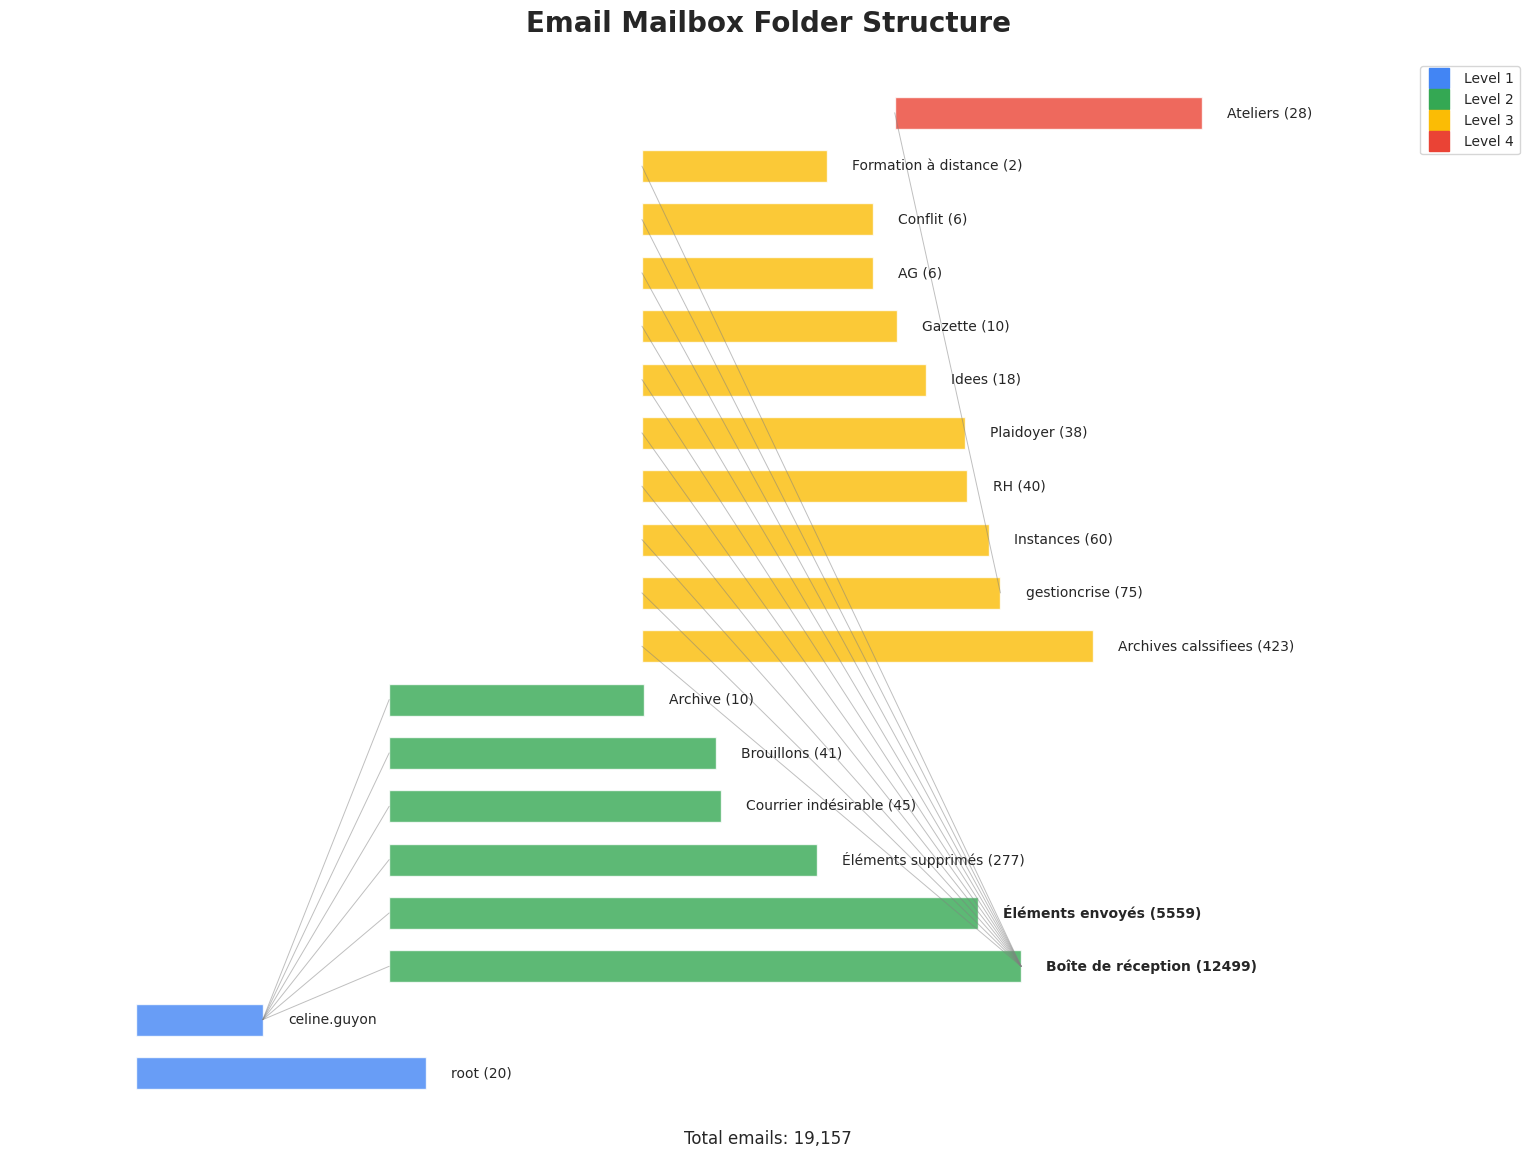

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Sample data from value_counts
data = {
    "celine.guyon/Boîte de réception": 12499,
    "celine.guyon/Éléments envoyés": 5559,
    "celine.guyon/Boîte de réception/Archives calssifiees": 423,
    "celine.guyon/Éléments supprimés": 277,
    "celine.guyon/Boîte de réception/gestioncrise": 75,
    "celine.guyon/Boîte de réception/Instances": 60,
    "celine.guyon/Courrier indésirable": 45,
    "celine.guyon/Brouillons": 41,
    "celine.guyon/Boîte de réception/RH": 40,
    "celine.guyon/Boîte de réception/Plaidoyer": 38,
    "celine.guyon/Boîte de réception/gestioncrise/Ateliers": 28,
    "root": 20,
    "celine.guyon/Boîte de réception/Idees": 18,
    "celine.guyon/Archive": 10,
    "celine.guyon/Boîte de réception/Gazette": 10,
    "celine.guyon/Boîte de réception/AG": 6,
    "celine.guyon/Boîte de réception/Conflit": 6,
    "celine.guyon/Boîte de réception/Formation à distance": 2
}

folder_counts = pd.Series(data)

# Process data for visualization
df = pd.DataFrame({'path': folder_counts.index, 'count': folder_counts.values})

# Function to parse folder structure
def parse_folder_structure(df):
    # Extract folder levels
    df['levels'] = df['path'].str.split('/')
    df['depth'] = df['levels'].apply(len)
    df['folder'] = df['levels'].apply(lambda x: x[-1])

    # Create parent-child relationships
    result = []
    for _, row in df.iterrows():
        levels = row['levels']
        for i in range(len(levels)):
            if i == 0:
                parent = "ROOT"
            else:
                parent = '/'.join(levels[:i])

            current = '/'.join(levels[:i+1])

            # Only add counts to complete paths
            count = row['count'] if current == row['path'] else 0

            result.append({
                'parent': parent,
                'path': current,
                'folder': levels[i],
                'count': count,
                'depth': i+1
            })

    # Convert to DataFrame and aggregate duplicate entries
    result_df = pd.DataFrame(result)
    aggregated = result_df.groupby(['parent', 'path', 'folder', 'depth']).sum().reset_index()

    return aggregated

# Parse the folder structure
folder_structure = parse_folder_structure(df)

# Custom visualization with matplotlib
def plot_folder_structure(folder_structure):
    # Get unique depths
    max_depth = folder_structure['depth'].max()

    # Create figure with custom size
    plt.figure(figsize=(16, 12))

    # Define a custom colormap
    colors = ['#4285F4', '#34A853', '#FBBC05', '#EA4335', '#8E24AA', '#0097A7']
    n_colors = len(colors)
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_colors)

    # Set the style
    sns.set_style("whitegrid")

    # Plot data
    y_positions = []
    y_position = 0
    labels = []
    sizes = []
    colors = []
    parents = []
    paths = []

    # Process each depth level
    for depth in range(1, max_depth + 1):
        level_data = folder_structure[folder_structure['depth'] == depth]
        level_data = level_data.sort_values('count', ascending=False)

        for _, row in level_data.iterrows():
            # Store position and data
            y_positions.append(y_position)
            labels.append(row['folder'])
            paths.append(row['path'])
            parents.append(row['parent'])

            # Calculate size (width of bar)
            count = row['count']
            # Log scale for better visualization
            size = 0.5 + (np.log1p(count) / np.log1p(folder_structure['count'].max())) * 2 if count > 0 else 0.5
            sizes.append(size)

            # Assign color based on depth
            color_idx = (depth - 1) % n_colors
            colors.append(custom_cmap(color_idx))

            y_position += 1

    # Create horizontal bars
    for i, (y, label, size, color, parent, path) in enumerate(zip(y_positions, labels, sizes, colors, parents, paths)):
        x = folder_structure.loc[folder_structure['path'] == path, 'depth'].values[0] - 0.5

        # Draw the bar
        plt.barh(y, size, left=x, height=0.6, color=color, alpha=0.8,
                 edgecolor='white', linewidth=1)

        # Add label
        count = folder_structure.loc[folder_structure['path'] == path, 'count'].values[0]
        if count > 0:
            label_text = f"{label} ({count})"
        else:
            label_text = label

        # Adjust text position based on bar size
        plt.text(x + size + 0.1, y, label_text, va='center', fontsize=10,
                 fontweight='bold' if count > 500 else 'normal')

        # Draw connector lines to parent
        if parent != "ROOT":
            # Find parent's position
            parent_indices = [j for j, p in enumerate(paths) if p == parent]
            if parent_indices:
                parent_y = y_positions[parent_indices[0]]
                parent_x = folder_structure.loc[folder_structure['path'] == parent, 'depth'].values[0] - 0.5
                parent_size = sizes[parent_indices[0]]

                # Draw a curved line connecting parent and child
                plt.plot([parent_x + parent_size, x], [parent_y, y], 'gray',
                         linestyle='-', linewidth=0.7, alpha=0.5)

    # Set the limits and labels
    plt.xlim(0, max_depth + 2)
    plt.ylim(-1, len(y_positions))

    # Remove axes
    plt.axis('off')

    # Add title and styling
    plt.title('Email Mailbox Folder Structure', fontsize=20, pad=20, fontweight='bold')

    # Add legend for depth levels
    legend_elements = []
    for d in range(1, min(max_depth+1, 7)):
        color_idx = (d - 1) % n_colors
        legend_elements.append(plt.Line2D([0], [0], color=custom_cmap(color_idx), lw=0,
                                         marker='s', markersize=15,
                                         label=f'Level {d}'))

    plt.legend(handles=legend_elements, loc='upper right', frameon=True)

    # Add a description
    total_emails = folder_structure['count'].sum()
    plt.figtext(0.5, 0.02, f"Total emails: {total_emails:,}", ha="center", fontsize=12)

    plt.tight_layout(pad=3)
    return plt

# Create and display the visualization
plot = plot_folder_structure(folder_structure)
plot.savefig('mailbox_structure.png', dpi=300, bbox_inches='tight')
plot.show()

In [ ]:
df_db_cleaned["recipient_email"].value_counts()

recipient_email
celine.guyon@archivistes.org           10658
unknown@example.com                     5735
delegation_generale@archivistes.org     3243
thomasvaisset@gmail.com                 2227
noewagener@protonmail.com               2067
                                       ...  
françoise.janin@culture.gouv.fr            1
mt.conseil283@orange.fr                    1
franckcormerais@gmail.com                  1
patrice.latron@intradef.gouv.fr            1
sonia.dollinger@mairie-beaune.gr           1
Name: count, Length: 1500, dtype: int64

In [ ]:
df_db_cleaned.shape

(70711, 32)

In [ ]:
df_db_cleaned.columns

Index(['email_id', 'message_id', 'mailbox_name', 'direction', 'timestamp',
       'subject', 'body', 'folder', 'is_deleted', 'is_spam',
       'importance_score', 'in_reply_to', 'references', 'sender_id',
       'sender_name', 'sender_email', 'sender_is_person', 'reply_to_id',
       'reply_to_name', 'reply_to_email', 'mailing_list_id',
       'mailing_list_name', 'mailing_list_email', 'attachment_count',
       'attachment_filenames', 'total_attachment_size', 'child_email_count',
       'mother_email_id', 'entity_id', 'recipient_name', 'recipient_email',
       'recipient_type'],
      dtype='object')

In [ ]:
df_db_cleaned.head(2)

,email_id,message_id,mailbox_name,direction,timestamp,subject,body,folder,is_deleted,is_spam,importance_score,in_reply_to,references,sender_id,sender_name,sender_email,sender_is_person,reply_to_id,reply_to_name,reply_to_email,mailing_list_id,mailing_list_name,mailing_list_email,attachment_count,attachment_filenames,total_attachment_size,child_email_count,mother_email_id,entity_id,recipient_name,recipient_email,recipient_type
0,f33d91c0-c455-42a6-b5fb-188ce5e02141,<ef84837018fc4f7ebed15d1a40374a9d@archivistes....,Boîte mail de Céline,received,2022-07-05 13:22:37,[aaf_adherents] AAF_élections : résultats des ...,"Bonjour,\nComme vous le savez, nous avons proc...",Éléments supprimés,False,False,0,,,560e14b1-a62b-4922-b966-a1d1a6f4275a,Nicolas Didon - responsable de la vie associat...,aaf_adherents@listes.archivistes.org,True,c46771a9-8b54-47b9-809e-327a8a602c8d,"AAF - Anne Clerc, déléguée générale",delegation_generale@archivistes.org,6f80b792-0448-4013-97cd-e36bae144323,aaf_adherents.listes.archivistes.org,sympa@listes.archivistes.org,7,"ATT00001.txt, 2022_pv_operations_electorales.p...",1047778.0,0,None,560e14b1-a62b-4922-b966-a1d1a6f4275a,Nicolas Didon - responsable de la vie associat...,aaf_adherents@listes.archivistes.org,to
1,ffe963fa-7e47-4943-9905-712f2231ae10,<1644247124553.20914@ch-bretagne-atlantique.fr>,Boîte mail de Céline,received,2022-02-07 15:18:44,RE: [AAF_CA2019-2022] Liste d'adhésions à vali...,"​Bonjour,\nC'est OK pour moi aussi.\nBonne fin...",Éléments supprimés,False,False,0,<d5485d890f264c22aba4ae2e906bdc64@departement-...,<01c1a62d748d4994a9a2f7eec6cd874d@archivistes....,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,True,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,f32f6294-733e-4cdc-b4c3-26d4595ee6fa,aaf_ca2019.listes.archivistes.org,sympa@listes.archivistes.org,1,image001.jpg,4614.0,0,None,96b63f75-24b3-48bb-99a4-cc6b37cd9f48,FAIVRE DARCIER Louis,aaf_ca2019@listes.archivistes.org,to


In [ ]:
df_db_cleaned[df_db_cleaned["to"] == "presidence@archivistes.org"]


KeyError: 'to'

In [ ]:
# duckdb_conn.execute("ALTER TABLE receiver_emails DROP COLUMN IF EXISTS embedding;")
# duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN embedding FLOAT[384];")

duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN IF NOT EXISTS embedding_tiny FLOAT[384];")
# duckdb_conn.execute("ALTER TABLE receiver_emails ADD COLUMN embedding_tiny FLOAT[384];")

In [ ]:

# Drop the embeddings table if it exists
duckdb_conn.execute("DROP TABLE IF EXISTS embeddings;")

In [ ]:
duckdb_conn.execute("""
    CREATE TABLE IF NOT EXISTS embeddings (
        email_id VARCHAR PRIMARY KEY,  -- Changed to VARCHAR to match receiver_emails(id)
        embedding_tiny BLOB,
        FOREIGN KEY (email_id) REFERENCES receiver_emails(id)
    );
""")

In [ ]:
# Describe the table to get the schema, which might show relationships
result = duckdb_conn.execute("DESCRIBE receiver_emails").fetchall()

# Print the schema result
print(result)


[('id', 'VARCHAR', 'NO', 'PRI', None, None), ('sender_email_id', 'VARCHAR', 'YES', None, None, None), ('sender_id', 'VARCHAR', 'YES', None, None, None), ('reply_to_id', 'VARCHAR', 'YES', None, None, None), ('mailbox_name', 'VARCHAR', 'YES', None, None, None), ('direction', 'VARCHAR', 'YES', None, None, None), ('timestamp', 'TIMESTAMP', 'YES', None, None, None), ('subject', 'VARCHAR', 'YES', None, None, None), ('body', 'VARCHAR', 'YES', None, None, None), ('is_deleted', 'BOOLEAN', 'YES', None, "CAST('f' AS BOOLEAN)", None), ('folder', 'VARCHAR', 'YES', None, "'inbox'", None), ('is_spam', 'BOOLEAN', 'YES', None, "CAST('f' AS BOOLEAN)", None), ('mailing_list_id', 'VARCHAR', 'YES', None, None, None), ('importance_score', 'INTEGER', 'YES', None, '0', None), ('mother_email_id', 'VARCHAR', 'YES', None, None, None), ('message_id', 'VARCHAR', 'YES', None, None, None), ('references', 'VARCHAR', 'YES', None, None, None), ('in_reply_to', 'VARCHAR', 'YES', None, None, None), ('embedding_tiny', 'FLO

In [ ]:
email_id = "f711645f-fa07-4637-9476-0eae7c71a305"
result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
if not result:
    print(f"Email ID {email_id} does not exist!")
else:
    # Proceed with the update logic
    print(f"Email ID {email_id} found, proceeding with embedding update.")


Email ID f711645f-fa07-4637-9476-0eae7c71a305 does not exist!


In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()
#         print(f"Processing email ID: {email_id}")

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         embedding = model.encode(combined_text)

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError("Embedding must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         duckdb_conn.execute(f"""
#             INSERT INTO embeddings (email_id, {embedding_col_name})
#             VALUES (?, ?)
#         """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage

#         if idx % log_every == 0 or idx == total:
#             print(f"[{idx}/{total}] Embedded and inserted email ID: {email_id}")

#     print(f"✅ All done. Updated {total} rows with embeddings.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         embedding = model.encode(combined_text)

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError("Embedding must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         duckdb_conn.execute(f"""
#             INSERT INTO embeddings (email_id, {embedding_col_name})
#             VALUES (?, ?)
#         """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage

#         # Log progress as percentage completion
#         if idx % log_every == 0 or idx == total:
#             percent_complete = (idx / total) * 100
#             print(f"[{percent_complete:.2f}%] Embedded {idx}/{total} emails")

#     print(f"✅ All done. Embedded {total} emails.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
## Version probably fonctional for research

In [ ]:
# from sentence_transformers import SentenceTransformer
# import duckdb
# import numpy as np
# import gc  # Garbage collection to release memory

# model = SentenceTransformer('all-MiniLM-L6-v2')

# def embed_emails(conn: duckdb.DuckDBPyConnection, limit: int = 100, log_every: int = 100, embedding_col_name: str = 'embedding_tiny') -> bool:
#     # Select emails without an embedding (from receiver_emails table)
#     rows = conn.execute(f"""
#         SELECT id, subject, body
#         FROM receiver_emails
#         WHERE id NOT IN (SELECT email_id FROM embeddings)
#         LIMIT ?
#     """, (limit,)).fetchall()

#     total = len(rows)
#     print(f"Found {total} emails to embed.")

#     # Example update logic with additional checks for consistency
#     for idx, row in enumerate(rows, start=1):
#         email_id, subject, body = row
#         combined_text = f"{subject or ''} {body or ''}".strip()
#         # print(f"Processing email ID: {email_id}")

#         # Check if the email_id exists before proceeding
#         result = duckdb_conn.execute("SELECT id FROM receiver_emails WHERE id = ?", (email_id,)).fetchall()
#         if not result:
#             print(f"Warning: Email ID {email_id} not found. Skipping.")
#             continue

#         # Generate the embedding
#         try:
#             embedding = model.encode(combined_text)
#         except Exception as e:
#             print(f"Error generating embedding for email ID {email_id}: {e}")
#             continue

#         # Sanity check
#         if len(embedding) != 384:
#             raise ValueError(f"Embedding for email ID {email_id} must be 384-dimensional")

#         # Insert embedding into the embeddings table
#         try:
#             duckdb_conn.execute(f"""
#                 INSERT INTO embeddings (email_id, {embedding_col_name})
#                 VALUES (?, ?)
#             """, (email_id, embedding.tobytes()))  # Convert numpy array to bytes for storage
#         except Exception as e:
#             print(f"Error inserting embedding for email ID {email_id}: {e}")
#             continue

#         # Log progress as percentage completion
#         if idx % log_every == 0 or idx == total:
#             percent_complete = (idx / total) * 100
#             print(f"[{percent_complete:.2f}%] Embedded {idx}/{total} emails")

#         # Release memory for large embeddings after each iteration
#         del embedding
#         gc.collect()  # Force garbage collection

#     print(f"✅ All done. Embedded {total} emails.")

#     return True


# # Example usage
# embed_emails(duckdb_conn, limit=30000)


In [ ]:
# # Install and load the vss extension
# duckdb_conn.execute("INSTALL vss;")
# duckdb_conn.execute("LOAD vss;")

# # Enable experimental persistence for HNSW
# duckdb_conn.execute("SET hnsw_enable_experimental_persistence=true;")

# # Create the index on the embeddings table
# duckdb_conn.execute("""
#     CREATE INDEX IF NOT EXISTS email_embedding_index
#     ON embeddings
#     USING HNSW (embedding_tiny)
#     WITH (metric = 'cosine');
# """)

In [ ]:
# Check the schema of your embeddings table
duckdb_conn.execute("DESCRIBE embeddings")
result = duckdb_conn.fetchall()
print(result)

[('email_id', 'VARCHAR', 'NO', 'PRI', None, None), ('embedding_tiny', 'BLOB', 'YES', None, None, None)]
